In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

In [ ]:
Image(filename='../Photos/checkerboard_18x18.png')

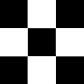

In [ ]:
Image(filename='../Photos/checkerboard_84x84.jpg')

In [ ]:
cb_image = cv.imread('../Photos/checkerboard_84x84.jpg', 0)

print(cb_image.shape)
print(cb_image.dtype)

(84, 84)
uint8


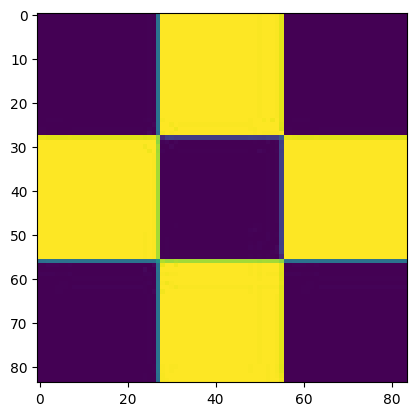

In [6]:
plt.imshow(cb_image)

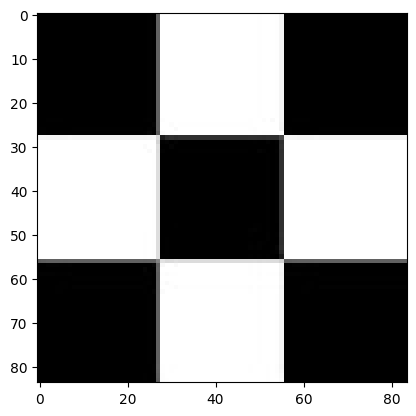

In [7]:
plt.imshow(cb_image, cmap='gray')

(18, 18)


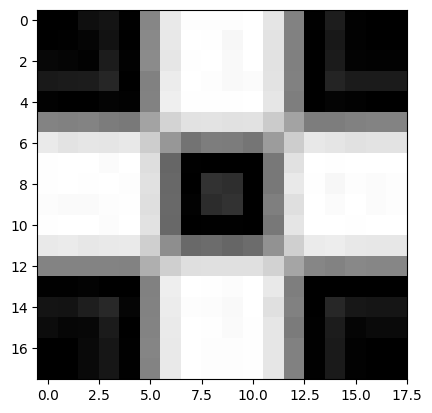

In [ ]:
cb_image_fuzzy = cv.imread('../Photos/checkerboard_fuzzy_18x18.jpg', 0)

print(cb_image_fuzzy.shape)

plt.imshow(cb_image_fuzzy, cmap='gray')

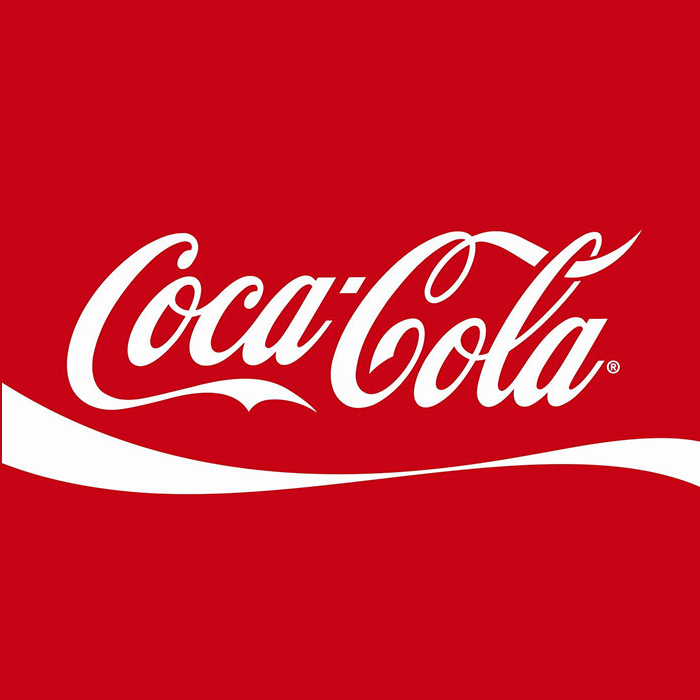

In [9]:
Image('../Photos/coca-cola-logo.png')

In [10]:
coke_image = cv.imread('../Photos/coca-cola-logo.png', 1)
print(coke_image.shape)
print(coke_image.dtype)

(700, 700, 3)
uint8


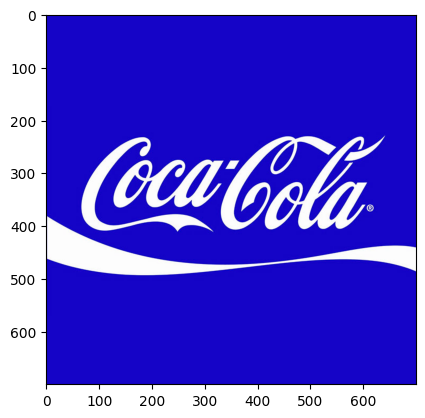

In [11]:
plt.imshow(coke_image)

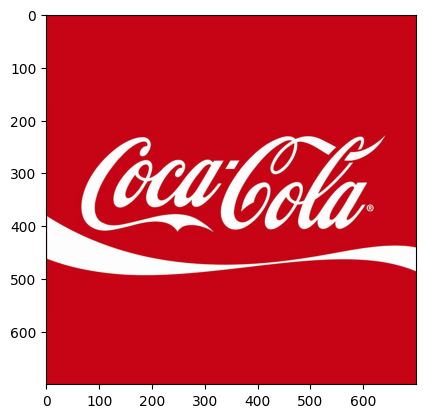

In [12]:
coke_image_reverse = coke_image[:, :, ::-1]
plt.imshow(coke_image_reverse)

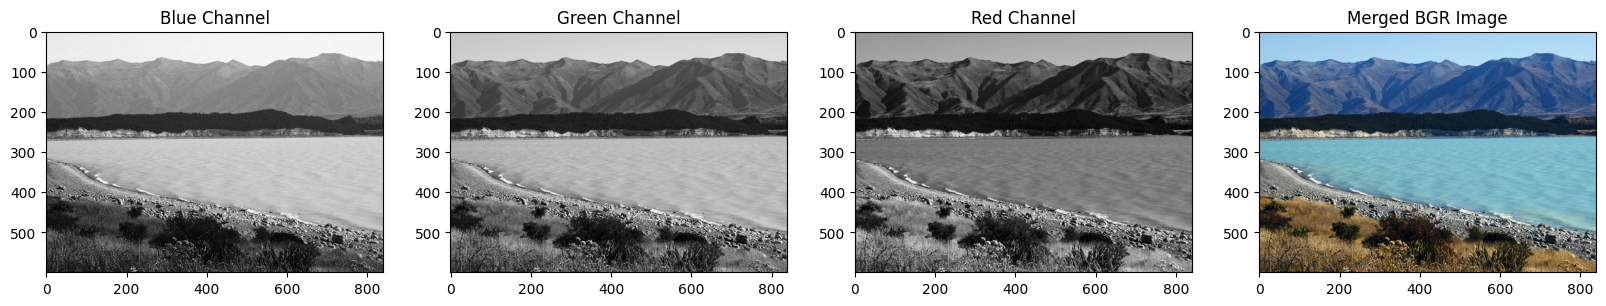

In [ ]:
img_NZ_bgr = cv.imread('../Photos/New_Zealand_Lake.jpg')
b, g, r = cv.split(img_NZ_bgr)

# Display the channels
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel')
plt.subplot(1, 4, 2)
plt.imshow(g, cmap='gray')
plt.title('Green Channel')
plt.subplot(1, 4, 3)
plt.imshow(r, cmap='gray')
plt.title('Red Channel')
merge_bgr = cv.merge((b, g, r))
plt.subplot(1, 4, 4)
plt.imshow(merge_bgr[:, :, ::-1])  # Convert BGR to RGB for display
plt.title('Merged BGR Image')
plt.show()

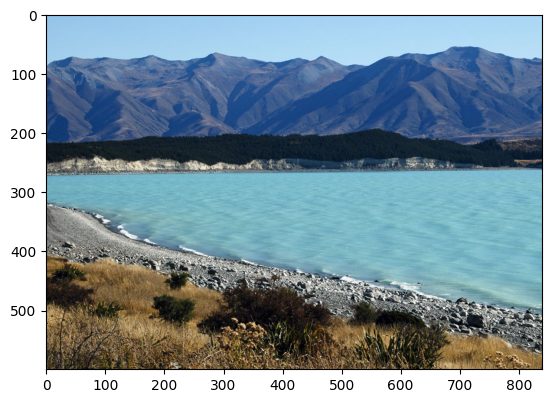

In [15]:
img_NZ_rgb = cv.cvtColor(img_NZ_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

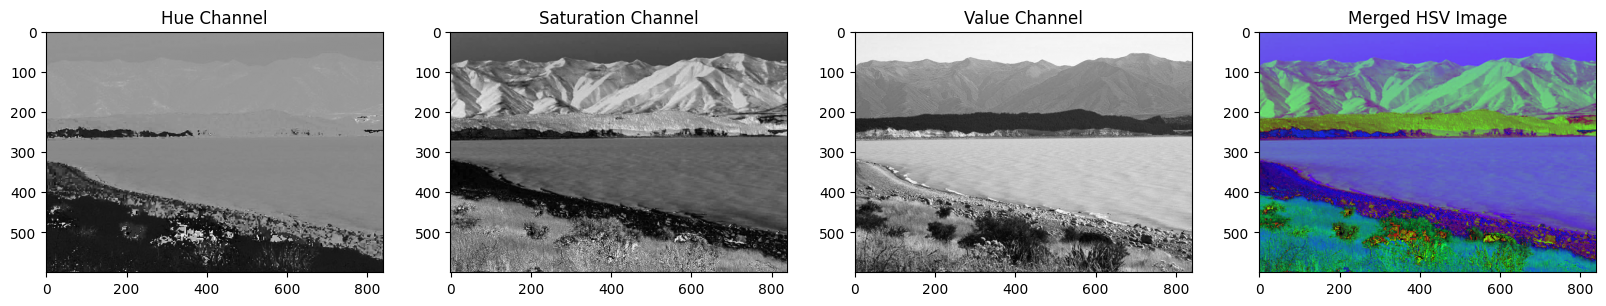

In [25]:
img_hsv = cv.cvtColor(img_NZ_bgr, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue Channel')
plt.subplot(1, 4, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation Channel')
plt.subplot(1, 4, 3)
plt.imshow(v, cmap='gray')
plt.title('Value Channel')
merge_hsv = cv.merge((h, s, v))
plt.subplot(1, 4, 4) 
plt.imshow(merge_hsv)
plt.title('Merged HSV Image')
plt.show()

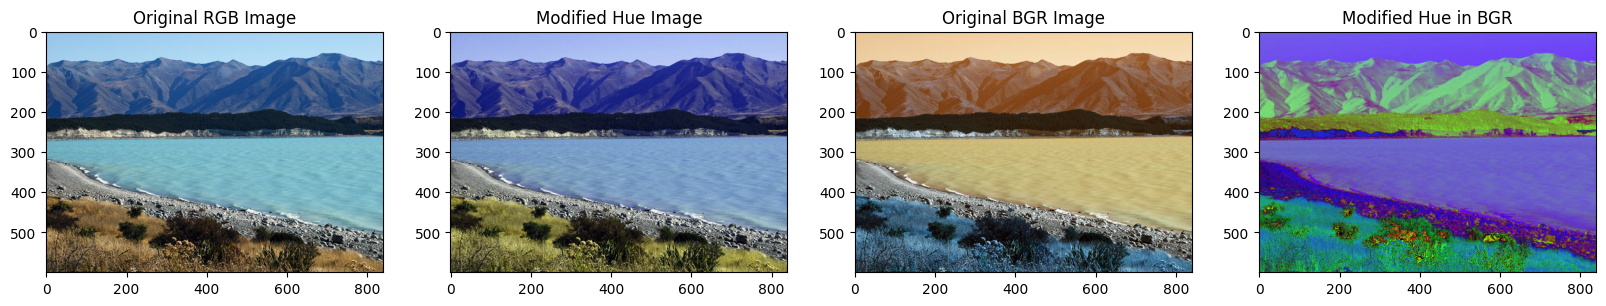

In [26]:
h_new = h + 10
img_NZ_merged_hue = cv.merge((h_new, s, v))
img_NZ_merged_hue_rgb = cv.cvtColor(img_NZ_merged_hue, cv.COLOR_HSV2RGB)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_NZ_rgb)
plt.title('Original RGB Image')
plt.subplot(1, 4, 2)
plt.imshow(img_NZ_merged_hue_rgb)
plt.title('Modified Hue Image')
plt.subplot(1, 4, 3)
plt.imshow(img_NZ_bgr)
plt.title('Original BGR Image')
plt.subplot(1, 4, 4)
plt.imshow(img_NZ_merged_hue)
plt.title('Modified Hue in BGR')
plt.show()

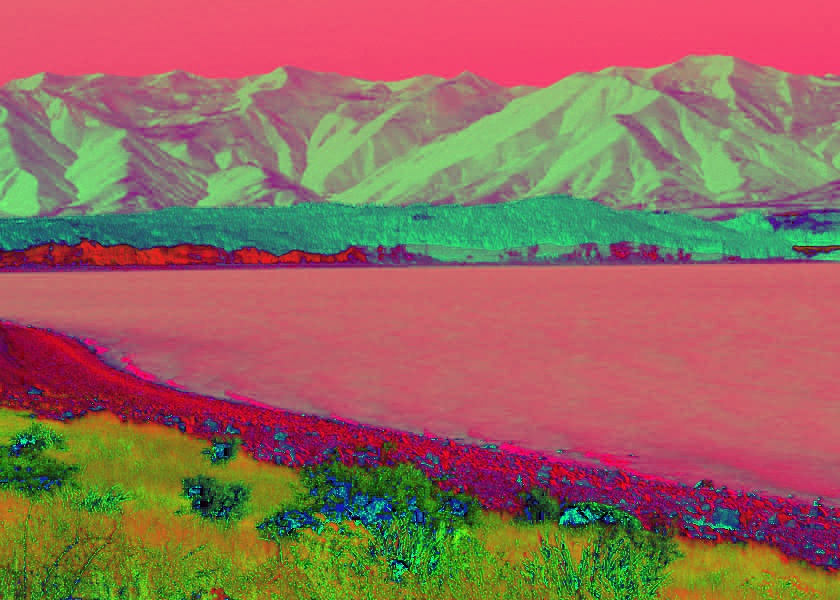

In [27]:
cv.imwrite('../Photos/New_Zealand_Lake_hue_modified.jpg', img_NZ_merged_hue)
Image(filename='../Photos/New_Zealand_Lake_hue_modified.jpg')